In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant
# import CSS_builder


In [154]:
# Setup
B_N = 14
B_M = 7
B_n = 7
B_indices = np.array([0, 1, 3])

# Matrix setup
B_c_start = np.zeros(B_n, dtype=int)
B_c_start[B_indices] += 1

In [155]:
# Construct the cyclic perfect difference set matrices

# This is actually the transpose of what I wanted
B_CirculantT = np.array(circulant(B_c_start))
print(B_CirculantT.T)

[[1 1 0 1 0 0 0]
 [0 1 1 0 1 0 0]
 [0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1]
 [1 0 0 0 1 1 0]
 [0 1 0 0 0 1 1]
 [1 0 1 0 0 0 1]]


In [156]:
# Add cyclic perfect difference set matrices together
B_Comp = np.zeros((B_n, 2*B_n), dtype=int)
B_Comp[:,B_n:2*B_n] = B_CirculantT
B_Comp[:,0:B_n] = B_CirculantT.T
print(B_Comp)

[[1 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [0 1 1 0 1 0 0 1 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 1]
 [0 0 0 1 1 0 1 1 0 1 1 0 0 0]
 [1 0 0 0 1 1 0 0 1 0 1 1 0 0]
 [0 1 0 0 0 1 1 0 0 1 0 1 1 0]
 [1 0 1 0 0 0 1 0 0 0 1 0 1 1]]


In [157]:
# Create H_0 to be used to make the A = ( H_0 |  0  ) matrix
#                                       (  0  | H_0 )
B_H_0 = B_Comp[0:B_M,0:B_N]
print(B_H_0)

[[1 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [0 1 1 0 1 0 0 1 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 1]
 [0 0 0 1 1 0 1 1 0 1 1 0 0 0]
 [1 0 0 0 1 1 0 0 1 0 1 1 0 0]
 [0 1 0 0 0 1 1 0 0 1 0 1 1 0]
 [1 0 1 0 0 0 1 0 0 0 1 0 1 1]]


In [158]:
# Construct the parity check matrix

B_PCM = np.zeros((2*B_M, 2*B_N), dtype=int)
B_PCM[0:B_M, 0:B_N] = B_H_0
B_PCM[B_M:2*B_M, B_N:2*B_N] = B_H_0

print(B_PCM)

[[1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1]]


In [159]:
for i in range(2*B_n):
    for j in range(B_n - (i%B_n) - 1):
        if np.count_nonzero(np.bitwise_and(B_PCM[i], B_PCM[i + j + 1])) != 2:
            print("Error:")
            print(B_PCM[i])
            print(B_PCM[i + j + 1])

In [160]:
B_start = B_starter([0, 1, 3], 7)
B_code = CSS(B.getH())
print(B_code.getPCM())
B_code.checkTP()

TypeError: '<' not supported between instances of 'list' and 'int'

In [22]:
x = np.arange(0.000, 0.20001, 0.0025)
y_tab = [0.0, 9.999999999998899e-5, 0.0008000000000000229, 0.0012999999999999678, 0.0022999999999999687, 0.0031999999999999806, 0.0049000000000000155, 0.005800000000000027, 0.007099999999999995, 0.009299999999999975, 0.010299999999999976, 0.012499999999999956, 0.017299999999999982, 0.016000000000000014, 0.018199999999999994, 0.02410000000000001, 0.026499999999999968, 0.028699999999999948, 0.03259999999999996, 0.03590000000000004, 0.04290000000000005, 0.04400000000000004, 0.04690000000000005, 0.051000000000000045, 0.05469999999999997, 0.05820000000000003, 0.06120000000000003, 0.06769999999999998, 0.07620000000000005, 0.07550000000000001, 0.07689999999999997, 0.0847, 0.08979999999999999]
y_kri = [0.0, 0.0043999999999999595, 0.00990000000000002, 0.01429999999999998, 0.019299999999999984, 0.026100000000000012, 0.02959999999999996, 0.033299999999999996, 0.03839999999999999, 0.04569999999999996, 0.049699999999999966, 0.0494, 0.05800000000000005, 0.06889999999999996, 0.06869999999999998, 0.07420000000000004, 0.07469999999999999, 0.0796, 0.08620000000000005, 0.08950000000000002, 0.09319999999999995, 0.09599999999999997, 0.0978, 0.11029999999999995, 0.1109, 0.11240000000000006, 0.12150000000000005, 0.124, 0.12739999999999996, 0.12990000000000002, 0.136, 0.13849999999999996, 0.13990000000000002]

y_tab2 = [0.0, 0.0, 0.0008000000000000229, 0.0010999999999999899, 0.0019000000000000128, 0.0030000000000000027, 0.0050000000000000044, 0.0047000000000000375, 0.007299999999999973, 0.008900000000000019, 0.010499999999999954, 0.013000000000000012, 0.01319999999999999, 0.015900000000000025, 0.019199999999999995, 0.021599999999999953, 0.028299999999999992, 0.028699999999999948, 0.03149999999999997, 0.032399999999999984, 0.035599999999999965, 0.0383, 0.04920000000000002, 0.0514, 0.05230000000000001, 0.05840000000000001, 0.06710000000000005, 0.06910000000000005, 0.07640000000000002, 0.07579999999999998, 0.08109999999999995, 0.08550000000000002, 0.09460000000000002, 0.09799999999999998, 0.10240000000000005, 0.10550000000000004, 0.10599999999999998, 0.118, 0.12350000000000005, 0.12329999999999997, 0.12770000000000004, 0.1362, 0.15090000000000003, 0.15259999999999996, 0.15180000000000005, 0.1562, 0.1634, 0.1735, 0.1763, 0.18869999999999998, 0.19140000000000001, 0.19420000000000004, 0.19510000000000005, 0.2148, 0.20540000000000003, 0.21609999999999996, 0.2237, 0.23150000000000004, 0.24329999999999996, 0.24539999999999995, 0.25129999999999997, 0.2539, 0.25980000000000003, 0.27480000000000004, 0.2731, 0.27690000000000003, 0.2873, 0.29290000000000005, 0.30820000000000003, 0.3053, 0.3124, 0.3133, 0.3288, 0.32620000000000005, 0.33609999999999995, 0.33630000000000004, 0.35629999999999995, 0.3468, 0.36119999999999997, 0.3741, 0.36650000000000005]
y_kri2 = [0.0, 0.006299999999999972, 0.008700000000000041, 0.014900000000000024, 0.019299999999999984, 0.021399999999999975, 0.02980000000000005, 0.03520000000000001, 0.038799999999999946, 0.04159999999999997, 0.050899999999999945, 0.05459999999999998, 0.05920000000000003, 0.0655, 0.0695, 0.07350000000000001, 0.07830000000000004, 0.07930000000000004, 0.08199999999999996, 0.09299999999999997, 0.09060000000000001, 0.09589999999999999, 0.10540000000000005, 0.1069, 0.11099999999999999, 0.11319999999999997, 0.12019999999999997, 0.12260000000000004, 0.12470000000000003, 0.12819999999999998, 0.13980000000000004, 0.13870000000000005, 0.13549999999999995, 0.14129999999999998, 0.14470000000000005, 0.1592, 0.15800000000000003, 0.16690000000000005, 0.16369999999999996, 0.1694, 0.18100000000000005, 0.17379999999999995, 0.1744, 0.18689999999999996, 0.19030000000000002, 0.1894, 0.1995, 0.20509999999999995, 0.19910000000000005, 0.20640000000000003, 0.21740000000000004, 0.20879999999999999, 0.21340000000000003, 0.21809999999999996, 0.2217, 0.23029999999999995, 0.23740000000000006, 0.24029999999999996, 0.2359, 0.2378, 0.24080000000000001, 0.2409, 0.2522, 0.24829999999999997, 0.25870000000000004, 0.26539999999999997, 0.2562, 0.26559999999999995, 0.2691, 0.2822, 0.2791, 0.2694, 0.2762, 0.2803, 0.2773, 0.2841, 0.28869999999999996, 0.2924, 0.2893, 0.30579999999999996, 0.30189999999999995]

ValueError: x and y must have same first dimension, but have shapes (81,) and (33,)

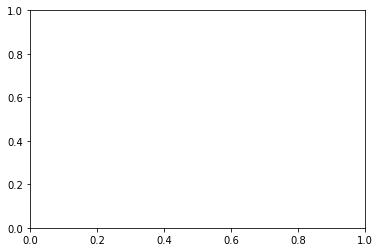

In [23]:
plt.plot(x, y_tab2, label="Decoder table")
plt.plot(x, y_kri2, label="Krishna's decoder")
plt.plot(x, x, label="Bit error = logical error")
plt.legend()
plt.show()